Welcome to the DS5100 Final Project package
initialized:
self.new_weight in change_weight: 5
self.faces in change_weight:    weights
0      1.0
1      1.0
2      1.0
3      5.0
4      1.0
5      1.0
weight changed:
self.faces_df type in create_die: <class 'pandas.core.frame.DataFrame'>
self.faces_df in create_die:    weights
0      1.0
1      1.0
2      1.0
3      5.0
4      1.0
5      1.0
n_sides in create_die: 6
self.faces_df.weights in create_die: 0    1.0
1    1.0
2    1.0
3    5.0
4    1.0
5    1.0
Name: weights, dtype: float64
my_probs in create_die: [0.1, 0.1, 0.1, 0.5, 0.1, 0.1]
sum (self.faces_df.weights) in create_die 10.0
self.faces_df type in create_die: <class 'pandas.core.frame.DataFrame'>
self.faces_df in create_die:    weights
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
n_sides in create_die: 6
self.faces_df.weights in create_die: 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: weights, dtype: float64
my_probs in create_die: [0.16666666

AttributeError: 'DataFrame' object has no attribute 'concat'

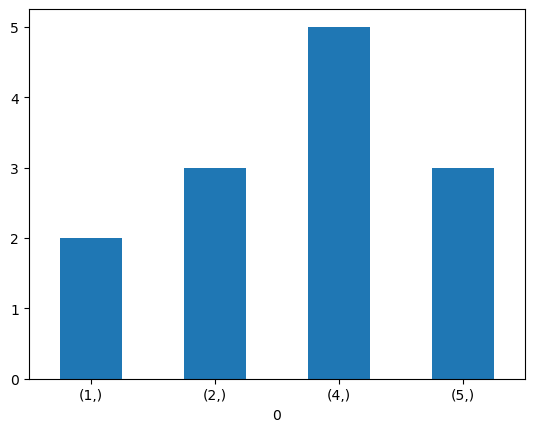

In [1]:
import numpy as np
import pandas as pd
import unittest
import finalproject
from die import Die
#from game import Game

class Analyzer():
    '''General Definition
    An Analyzer object takes the results of a single game and 
    computes various descriptive statistical properties about it.
    Specific Methods and Attributes:
        1. An initializer
        2. Jackpot
        3. Face counts per roll
        4. Combo_count
        5. Permutation count
    '''
    def __init__(self, die_list):
        '''     
        Takes a game object as its input parameter.
        Throws a ValueError if the passed value is not a Game object
        '''
        self.die_list = die_list
        return
    
    def jackpot (self, number_of_rolls):
        '''
        A jackpot is a result in which all faces are the same,
            e.g. all ones for a six-sided die.
        Computes how many times the game resulted in a jackpot.
        Returns an integer for the number of jackpots. 
        
        ### jackpot PSEUDO CODE:
        
        Input is DataFrame with roll # index, 
            and column for each Die result (face):
        
                Die1 Die2 Die3
        roll #
            1     6    4    3
            2     1    3    3
            3     4    5    1
            4     1    1    1
            5     6    2    5
            
        jackpot_number = 0
        For each roll n
            if Die1 face == Die2 face == Die3 face
                jackpot_number += 1
        return jackpot_number

        loop_result_list = []    # contains each die's roll result
        for i in range(len(self.die_list)):
            loop_result = self.die_list[i].roll_die(number_of_rolls)
            loop_result_list.append (loop_result)
            
        print ('length of loop_result_list:', len(loop_result_list))
        print ('loop_result_list:', loop_result_list)
            
        self.results1 = self.die_list.roll_die(number_of_rolls)
        print ('rolled die:') 
        print ('results:', self.results1)

        ### END jackpot PSEUDO CODE
        '''
        
        '''
        df = pd.DataFrame.from_dict({'a':'C C A'.split(),
                        'b':'C C A'.split(),
                        'c':'C A A'.split(),
                        'd':'C A A'.split()})
        df.apply(lambda x: len(set(x)) == 1, axis=1)
        0     True
        1    False
        2     True
        dtype: bool
        
        
        
        
        self.number_of_rolls = number_of_rolls
        
        self.results1 = self.die_list.roll_die(self.number_of_rolls)
        print ('rolled die:') 
        print ('results:', self.results1)


    def face_counts_per_roll  (self, form = 'w'):
        '''
        Computes how many times a given face is rolled in each event.
        For example, if a roll of five dice has all sixes, 
            then the counts for this roll would be 
            for the face value ‘6’ and for the other faces.
        Returns a data frame of results.
        The data frame has an index of the roll number,
            face values as columns, 
            and count values in the cells (i.e. it is in wide format).   
           
        ### face_counts_per_roll PSEUDO CODE:
        
        Input is DataFrame with roll # index, 
            and column for each Die result (face):
        
                Die1 Die2 Die3
        roll #
            1     6    4    3
            2     1    3    3
            3     4    5    1
            4     1    1    1
            5     6    2    5

        For each roll n
            all die_face_count in row <- 0
            for each Die_n_value
                face_count[Die_n_value] += 1
        return results_data_frame (below)

        Results DataFrame
                Face1 Face2 Face3 Face4 Face5 Face6
        roll #
            1     0     0     1     1     0     1
            2     1     0     2     0     0     0
            3     1     0     0     1     1     0
            4     3     0     0     0     0     0
            5     0     1     0     0     1     1
                
        ### END face_counts_per_roll PSEUDO CODE

        '''
        
    def combo_count (self, ):
        '''
        Computes the distinct combinations of faces rolled,
            along with their counts.
        Combinations are order-independent and may contain repetitions.
        Returns a data frame of results.
        The data frame should have a MultiIndex of distinct combinations
            and a column for the associated counts.
        
        ### combo_count PSEUDO CODE:
        
        Input is DataFrame with roll # index, 
            and column for each Die result (face):
        
                Die1 Die2 Die3
        roll #
            1     6    4    3
            2     1    3    3
            3     4    5    1
            4     1    1    1
            5     6    2    5
            6     1    5    4

        face_values_list = []
        For each roll n
            populate roll_list with roll's face values
            sort (face_values)
            append roll_list to face_values_list
        sort (face_value_list)

        face_values_list DataFrame:

        roll_list before sorting
        roll #
            1  [3, 4, 6]
            2  [1, 3, 3]
            3  [1, 4, 5]
            4  [1, 1, 1]
            5  [2, 5, 6]
            6  [1, 4, 5]
            
        roll_list after sorting
        roll #
            4  [1, 1, 1]
            2  [1, 3, 3]
            3  [1, 4, 5]
            6  [1, 4, 5]
            5  [2, 5, 6]
            1  [3, 4, 6]
        
        face_value_list = ['roll_list', 'count']
        for i in range(len(row_list))
            if row_list[i] not in face_value_list
                add row_list[i] to face_values_list[0]
                count[i] <- 1
            else count[i] += 1
        return face_values_list
        
        combo_list dataframe:
        
        roll_list  count
        [1, 1, 1]    1
        [1, 3, 3]    1
        [1, 4, 5]    2
        [2, 5, 6]    1
        [3, 4, 6]    1
                 

        ### END combo_count PSEUDO CODE
        '''

        
    def permutation_count (self, ):
        '''
        Computes the distinct permutations of faces rolled, a
            long with their counts.
        Permutations are order-dependent and may contain repetitions.
        Returns a data frame of results.
        The data frame should have a MultiIndex of distinct permutations
        and a column for the associated counts.

        ### permutation_count PSEUDO CODE:
        
        Input is DataFrame with roll # index, 
            and column for each Die result (face):
        
                Die1 Die2 Die3
        roll #
            1     6    4    3
            2     1    3    3
            3     4    5    1
            4     1    1    1
            5     6    2    5
            6     1    5    4
            7     1    3    3

        face_values_list = []
        For each roll n
            populate roll_list with roll's face values
            sort (face_values)
            append roll_list to face_values_list
        sort (face_value_list)

        face_values_list DataFrame:

        roll_list before sorting
        roll #
            1  [6, 4, 3]
            2  [1, 3, 3]
            3  [4, 5, 1]
            4  [1, 1, 1]
            5  [6, 2, 5]
            6  [1, 5, 4]
            7  [1, 3, 3]
            
        roll_list after sorting
        roll #
            4  [1, 1, 1]
            2  [1, 3, 3]
            7  [1, 3, 3]
            6  [1, 5, 4]
            3  [4, 5, 1]
            5  [6, 2, 5]
            1  [6, 4, 3]
        
        face_value_list = ['roll_list', 'count']
        for i in range(len(row_list))
            if row_list[i] not in face_value_list
                add row_list[i] to face_values_list[0]
                count[i] <- 1
            else count[i] += 1
        return face_values_list
        
        permutation_list dataframe:
        
        roll_list  count
        [1, 1, 1]    1
        [1, 3, 3]    2
        [1, 5, 4]    1
        [4, 5, 1]    1
        [6, 2, 5]    1
        [6, 4, 3]    1
                 

        ### END permutation_count PSEUDO CODE
        '''
                
        self.form = form.lower()
        if self.form != 'w' or self.form != 'n':
            raise ValueError('form is not "w" or "n".')
        return

        # verify faces is type (np.ndarray); TypeError if not
        if not isinstance (self.faces, np.ndarray):
            raise TypeError('faces is not an np array')

        # Tests to see if the values are distinct; ValueError if not
        if len(self.faces) != len(set(self.faces)):    # 'set' values are unique
            raise ValueError('faces are not unique')
            # NOTE: faces = np.unique (faces) removes "redundant" values        

        # Internally initializes the weights to 1.0 for each face.
        self.weights = np.ones(len(self.faces))
        #print (faces, weights)

        # Saves both faces and weights in a private data frame
        #   with faces in the index.
        index_values = [self.faces]
        self.faces_df = pd.DataFrame({'weights': self.weights}, index=index_values)
        
        
class AnalyzerTestSuite(unittest.TestCase):
    
    def test_1_jackpot(self): 
        # 
        print ('entering test_1_jackpot')        
 
        faces = np.arange (6)  # creates array
        faces_df = Die(faces)
        print ('initialized:')

        faces_df.change_weight (4, 5)
        print ('weight changed:')

    def test_2_face_counts_per_roll(self):
        print ('entering test_2_create_die')
        # 
        '''Create the die using the object's weights. Save to self as a DataFrame.'''
        n_sides = len(self.faces_df.weights)
        my_probs = [i/sum(self.faces_df.weights) for i in self.faces_df.weights]
        self.die = pd.DataFrame({
        'side': range(1, n_sides + 1),
        'weights': my_probs
        })
        self.assertTrue(isinstance (self.die, pd.DataFrame))
        return self.die

    def test_3_combo_count(self):
        print ('entering test_3_combo_count')

    def test_4_permutation_count(self):
        print ('entering test_4_permutation_count')

    
    
    
    
faces = np.arange (6)  # creates array
faces_df1 = Die(faces) # instantiate Game objects
faces_df2 = Die(faces)
print ('initialized:')

faces_df1.change_weight (4, 5)
print ('weight changed:')

die1 = faces_df1.create_die (faces_df1)  # create die
die2 = faces_df2.create_die (faces_df2)
print ('created die:')

print ('show die state 1:')
die_deep1 = faces_df1.show_die_state (die1)
print (die_deep1)
print ('show die state 2:')
die_deep2 = faces_df2.show_die_state (die2)
print (die_deep2)

die_list = [die1, die2]
print ('die_list:', die_list)

n_rolls = 10


print ('rolled die:') 
results1 = faces_df1.roll_die(n_rolls)
print ('results1 type', type (results1))
print ('results1:', results1)
faces_df1.plot_results (results1)


print ('in between plots')
results2 = faces_df2.roll_die(n_rolls)
print ('results2:', results2)
faces_df2.plot_results (results2)

results_df = pd.DataFrame()
#print ('results_df head:', results_df.head(10))
#print ('results_df type:' ,type (results_df))
results1 = faces_df1.roll_die(n_rolls)
#print ('results1 head', results1.head(10))
#print ('results1 type:', type(results1))
results_df = results_df.concat ([results1])
print ('inside play loop:', results_df)



if __name__ == '__main__':
    unittest.main(verbosity=3)

In [2]:
help (Analyzer)

Help on class Analyzer in module __main__:

class Analyzer(builtins.object)
 |  Analyzer(die_list)
 |  
 |  General Definition
 |  An Analyzer object takes the results of a single game and 
 |  computes various descriptive statistical properties about it.
 |  Specific Methods and Attributes:
 |      1. An initializer
 |      2. Jackpot
 |      3. Face counts per roll
 |      4. Combo_count
 |      5. Permutation count
 |  
 |  Methods defined here:
 |  
 |  __init__(self, die_list)
 |      Takes a game object as its input parameter.
 |      Throws a ValueError if the passed value is not a Game object
 |  
 |  combo_count(self)
 |      Computes the distinct combinations of faces rolled,
 |          along with their counts.
 |      Combinations are order-independent and may contain repetitions.
 |      Returns a data frame of results.
 |      The data frame should have a MultiIndex of distinct combinations
 |          and a column for the associated counts.
 |      
 |      ### combo_cou